In [1]:
%run "TestCase-Class.ipynb"

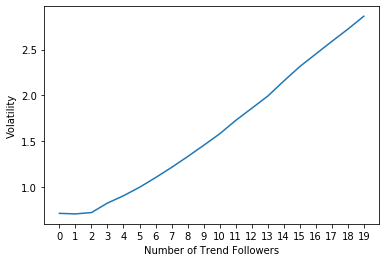

In [2]:
# test volatility
volatility = []
num_tf = [x for x in range(20)]

for i in range(20):
    volatility_test = TestCase(X, S_cos)
    volatility_test.add_trader(i, TrendFollower)
    volatility_test.update_price()
    volatility.append(volatility_test.get_volatility())
    
plt.plot(num_tf, volatility)
plt.xlabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.ylabel('Volatility')
plt.show()

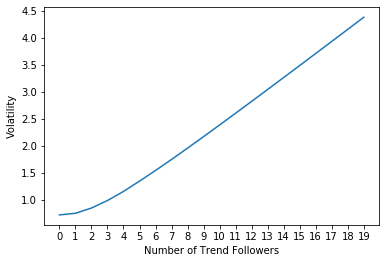

In [3]:
volatility = []
num_mr = [x for x in range(20)]

for i in range(20):
    volatility_test = TestCase(X, S_cos)
    volatility_test.add_trader(i, MeanReversion)
    volatility_test.update_price()
    volatility.append(volatility_test.get_volatility())
    
plt.plot(num_mr, volatility)
plt.xlabel('Number of Trend Followers')
plt.xticks(num_mr)
plt.ylabel('Volatility')
plt.show()

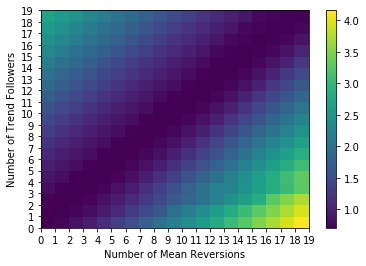

In [4]:
# 2D Volatility with Trend Follower and Mean Reversion
volatility_2d = np.zeros((20, 20))

num_tf = [x for x in range(20)]
num_mr = [x for x in range(20)]

for i in range(len(num_tf)):
    for j in range(len(num_mr)):
        volatility_2dtest = TestCase(X, S_cos)
        volatility_2dtest.add_trader(i, TrendFollower)
        volatility_2dtest.add_trader(j, MeanReversion)
        volatility_2dtest.update_price()
        volatility_2d[i][j] = volatility_2dtest.get_volatility()
        
plt.pcolormesh(num_tf, num_mr, volatility_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

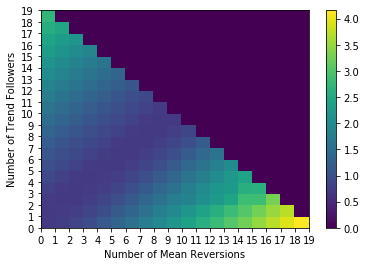

In [5]:
# 2D test with fixed total traders
num_traders = 20
fixed_2d = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        if tf + mr >= num_traders - 1:
            break
        rt = num_traders - 1 - tf - mr
        fixed_2dtest = TestCase(X, S_cos)
        fixed_2dtest.add_trader(tf, TrendFollower)
        fixed_2dtest.add_trader(mr, MeanReversion)
        fixed_2dtest.add_trader(rt, RandomTrader)
        fixed_2dtest.update_price()
        fixed_2d[tf][mr] = fixed_2dtest.get_volatility()

plt.pcolormesh(num_tf, num_mr, fixed_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

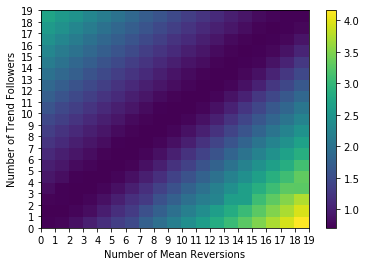

In [6]:
#2D test with fixed total traders up-filled by Random Traders
num_traders = 20
fixed_fill_2d = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        rt = 38 - tf - mr
        fixed_fill_2dtest = TestCase(X, S_cos)
        fixed_fill_2dtest.add_trader(tf, TrendFollower)
        fixed_fill_2dtest.add_trader(mr, MeanReversion)
        fixed_fill_2dtest.add_trader(rt, RandomTrader)
        fixed_fill_2dtest.update_price()
        fixed_fill_2d[tf][mr] = fixed_fill_2dtest.get_volatility()
        
plt.pcolormesh(num_tf, num_mr, fixed_fill_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

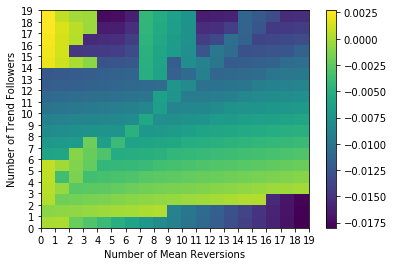

In [7]:
#2d test with average price
average_price_2d = np.zeros((20, 20))

for i in range(len(num_tf)):
    for j in range(len(num_mr)):
        average_price_2dtest = TestCase(X, S_cos)
        average_price_2dtest.add_trader(i, TrendFollower)
        average_price_2dtest.add_trader(j, MeanReversion)
        average_price_2dtest.update_price()
        average_price_2d[i][j] = np.mean(average_price_2dtest.get_price()) - np.mean(S_cos)
        
plt.pcolormesh(num_tf, num_mr, average_price_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

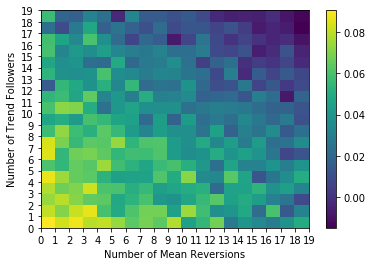

In [8]:
#2d fixed test with average price
num_traders = 20
fixed_fill_2d_price_average = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        rt = 38 - tf - mr
        fixed_fill_2dtest = TestCase(X, S_cos)
        fixed_fill_2dtest.add_trader(tf, TrendFollower)
        fixed_fill_2dtest.add_trader(mr, MeanReversion)
        fixed_fill_2dtest.add_trader(rt, RandomTrader)
        fixed_fill_2dtest.update_price()
        fixed_fill_2d_price_average[tf][mr] = np.mean(fixed_fill_2dtest.get_price()) - np.mean(S_cos)
        
plt.pcolormesh(num_tf, num_mr, fixed_fill_2d_price_average)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

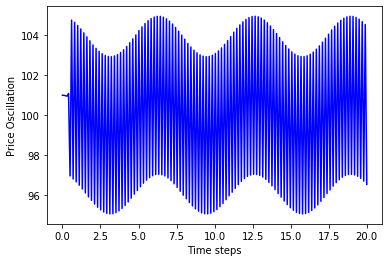

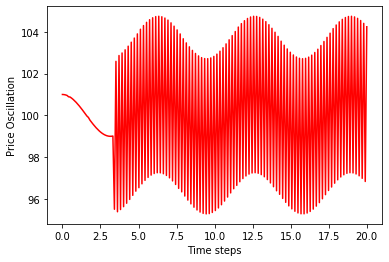

In [9]:
#Test change in the average price
test_tf_change1 = TestCase(X, S_cos)
test_tf_change1.add_trader(2, TrendFollower)
test_tf_change1.add_trader(19, MeanReversion)
test_tf_change1.update_price()
price_2tf = test_tf_change1.get_price()

test_tf_change2 = TestCase(X, S_cos)
test_tf_change2.add_trader(3, TrendFollower)
test_tf_change2.add_trader(19, MeanReversion)
test_tf_change2.update_price()
price_3tf = test_tf_change2.get_price()

plt.plot(t, price_2tf, 'b')
plt.xlabel('Time steps')
plt.ylabel('Price Oscillation')
plt.show()

plt.plot(t, price_3tf, 'r')
plt.xlabel('Time steps')
plt.ylabel('Price Oscillation')
plt.show()

In [10]:
tf_test_1 = test_tf_change1.get_trader(0)
mr_test_1 = test_tf_change1.get_trader(2)
tf_test_2 = test_tf_change2.get_trader(0)
mr_test_2 = test_tf_change2.get_trader(3)

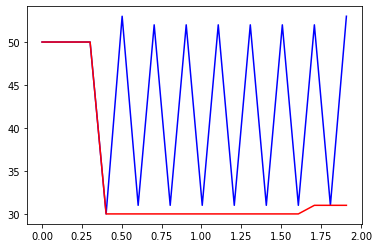

In [11]:
plt.plot(t[0:20], tf_test_1.get_stock()[0:20], 'b', t[0:20], tf_test_2.get_stock()[0:20], 'r')
plt.show()

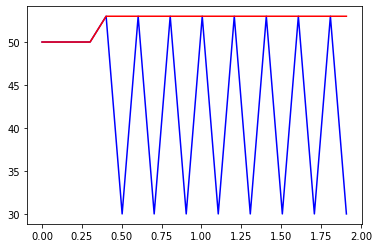

In [12]:
plt.plot(t[0:20], mr_test_1.get_stock()[0:20], 'b', t[0:20], mr_test_2.get_stock()[0:20], 'r')
plt.show()

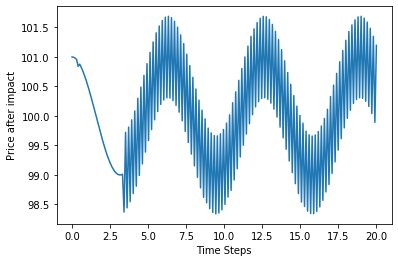

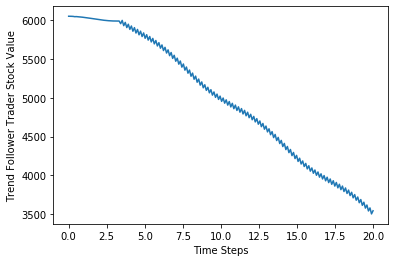

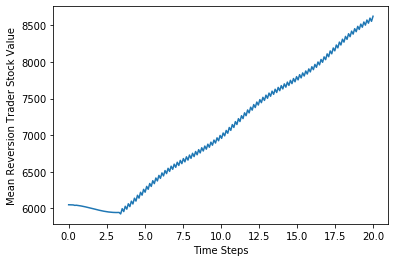

In [13]:
# robust correlation 
test_correlation_1 = TestCase(X, S_cos)
test_correlation_1.add_trader(1, TrendFollower)
test_correlation_1.add_trader(4, MeanReversion)
test_correlation_1.update_price()
test_correlation_1.plot_price()

trader1 = test_correlation_1.get_trader(0)
trader2 = test_correlation_1.get_trader(-1)
value1 = trader1.get_value(test_correlation_1.get_price())
value2 = trader2.get_value(test_correlation_1.get_price())
plt.plot(t, value1)
plt.xlabel('Time Steps')
plt.ylabel('Trend Follower Trader Stock Value')
plt.show()
plt.plot(t, value2)
plt.xlabel('Time Steps')
plt.ylabel('Mean Reversion Trader Stock Value')
plt.show()